<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Faculty: <b>Moses Boudourides</b><br/>
Fall Semester 2019<br/>
New York University Abu Dhabi</div>

## <span style="color:red">EXPERIMENT 4</span>
# <span style="color:green">Subgraphs, Triangles, Cycles and Ego-Nets

[1. Subgraphs](#1)

[2. Triangles](#2)

[3. Cycles](#3)

[4. Egocentric Subgraphs (Ego-Nets)](#4)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import random
import math
import numpy as np
import scipy as sp
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
from pylab import hist

<a id='1'></a>
## 1. Subgraphs

**Let *G = (V, E)* be a graph.**

* **Given a set** ***X*** **of vertices of** ***G*** **(i.e.,** ***X ⊂ V***), **the** ***vertex-induced subgraph*** **of** ***X*** **is a graph** ***G(X) = (X, E(X))***, **where** ***E(X) ⊂ E*** **contains all the edges of** ***E*** **with end-points in** ***X***, **i.e.,** ***E(X) = {(u,v) ∈ E: u, v ∈ in X}***.
* **Given a set** ***Y*** **of edges of** ***G*** **(i.e.,** ***Y ⊂ E***), **the** ***edge-induced subgraph*** **of** ***Y*** **is a graph** ***G(Y) = (V(Y), Y)***, **where** ***V(Y) ⊂ V*** **contains all the vertices of** ***V*** **which are the end-points of all edges in** ***Y***, **i.e.,** ***V(Y) = {u ∈ V: (u,v) ∈ Y or (v,u) ∈ Y}*.**

**Here we will be only concerned with *vertex-induced subgraphs* that we will be calling (simply) *subgraphs*.** 

**NetworkX command:** 

***G.subgraph(X)*** 

### Example of subgraph of undirected graph

Graph isolates: []
Subgraph of [0, 4, 5, 6, 8]
True
Subgraph isolates: []


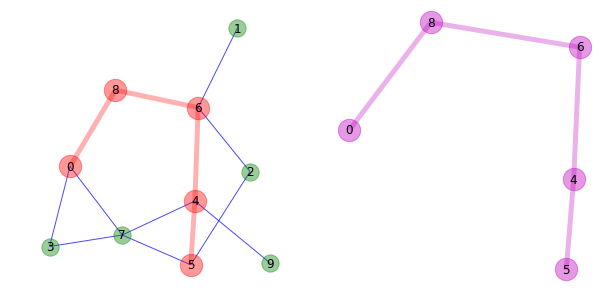

In [2]:
G=nx.erdos_renyi_graph(10,0.25)
print "Graph isolates:",list(nx.isolates(G))

X=sorted(random.sample(G.nodes(),5))
print "Subgraph of",X

GX=G.subgraph(X)
print X==sorted(GX.nodes())
print "Subgraph isolates:",list(nx.isolates(GX))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
G=G.subgraph(X)
# pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
pos={k:v for k,v in pos.items() if k in X}
nodes = nx.draw_networkx_nodes(G, pos, node_size=500,node_color="m", alpha=0.4)
nx.draw_networkx_edges(G, pos, width=5,edge_color="m", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Example of subgraph of directed graph

Graph isolates: []
Subgraph of [0, 4, 6, 8, 9]
True
Subgraph isolates: []


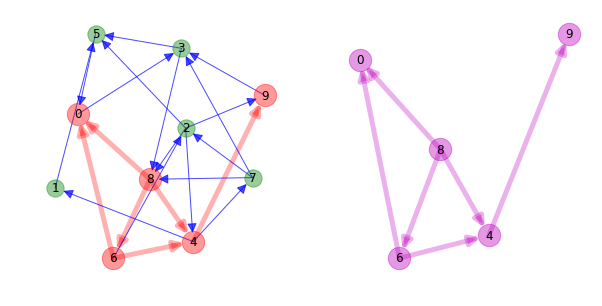

In [3]:
G=nx.erdos_renyi_graph(10,0.25,directed=True)
print "Graph isolates:",list(nx.isolates(G))

X=sorted(random.sample(G.nodes(),5))
print "Subgraph of",X

GX=G.subgraph(X)
print X==sorted(GX.nodes())
print "Subgraph isolates:",list(nx.isolates(GX))

cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
nodes = nx.draw_networkx_nodes(G, pos, nodelist=X,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');
plt.subplot(122)
G=G.subgraph(X)
# pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
pos={k:v for k,v in pos.items() if k in X}
nodes = nx.draw_networkx_nodes(G, pos, node_size=500,node_color="m", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,width=5,edge_color="m", alpha=0.3)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

<a id='2'></a>
## 2. Triangles

**Let** ***G*** **be a graph and** ***u*** **a node of** ***G*.** 

* **The** ***clustering coefficient*** **of** ***u*** **is defined as the ratio of the number of triangles through node** ***u*** **divided by the number of all possible triangles through that node. Notice that, if the degree if** ***u*** **is** ***k***, **then the number of all possible triangles through** ***u*** **is equal to** ***k(k-1)/2*.**

* **The** ***transitivity*** **of graph** ***G*** **is defined as the ratio of the number of triangles in** ***G*** **divided by the number of all possible triangles in** ***G***. **Notice that the number of all possible triangles in** ***G*** **is equal to the number of all existring** ***triads*** **in** ***G***, **where a triad is defined as two edges with a shared vertex.**

### Triangles in undirected graphs

[[1, 3, 8], [1, 8, 9], [2, 4, 5], [3, 4, 8], [4, 5, 6]]
There are 5 triangles in this graph: [[1, 3, 8], [1, 8, 9], [2, 4, 5], [3, 4, 8], [4, 5, 6]]
The transitivity of this graph is 0.300
ltrid {0: 0, 1: 2, 2: 1, 3: 2, 4: 3, 5: 2, 6: 1, 7: 0, 8: 3, 9: 1}
{0: 0, 1: 2, 2: 1, 3: 2, 4: 3, 5: 2, 6: 1, 7: 0, 8: 3, 9: 1}
Node 1 is in the 2 triangles [[1, 3, 8], [1, 8, 9]] and the clustering coefficient of node 1 is 0.200


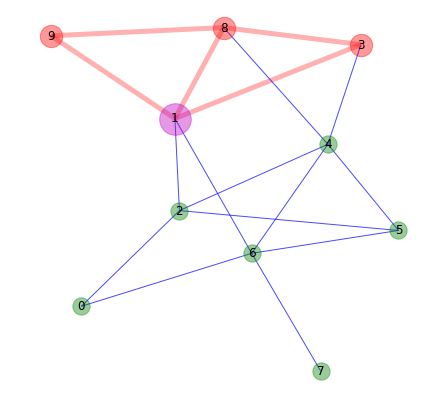

In [4]:
while True:
    G=nx.erdos_renyi_graph(10,0.35)
    cliques=list(nx.clique.enumerate_all_cliques(G))
    triangles=[ z for z in cliques if len(z)==3 ]
    if len(triangles)>3: 
        break

cliques=list(nx.clique.enumerate_all_cliques(G))
triangles=[ z for z in cliques if len(z)==3 ]
print triangles

print "There are %i triangles in this graph: %s" %(len(triangles),triangles)
print "The transitivity of this graph is %.3f" %nx.transitivity(G)
trid={}
for n in G.nodes():
    u=[]
    for t in triangles:
        if n in t:
            u.append(t)
    trid[n]=u

ltrid={k:len(v) for k,v in trid.items()}

print "ltrid",ltrid
print nx.triangles(G)
    
tri=random.choice(triangles) 
x=random.choice(tri)

X=trid[x] 
print "Node %i is in the %i triangles %s and the clustering coefficient of node %i is %.3f" %(x,len(X),X,x,nx.clustering(G,x))

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Counting triangles in undirected graphs

There are 38 triangles in this graph
{0: 0, 1: 3, 2: 1, 3: 2, 4: 1, 5: 3, 6: 1, 7: 1, 8: 8, 9: 1, 10: 2, 11: 3, 12: 1, 13: 1, 14: 2, 15: 3, 16: 1, 17: 2, 18: 0, 19: 1, 20: 5, 21: 2, 22: 1, 23: 5, 24: 1, 25: 2, 26: 2, 27: 2, 28: 1, 29: 5, 30: 4, 31: 1, 32: 0, 33: 3, 34: 1, 35: 1, 36: 0, 37: 5, 38: 1, 39: 6, 40: 1, 41: 1, 42: 4, 43: 3, 44: 8, 45: 2, 46: 0, 47: 3, 48: 4, 49: 3}


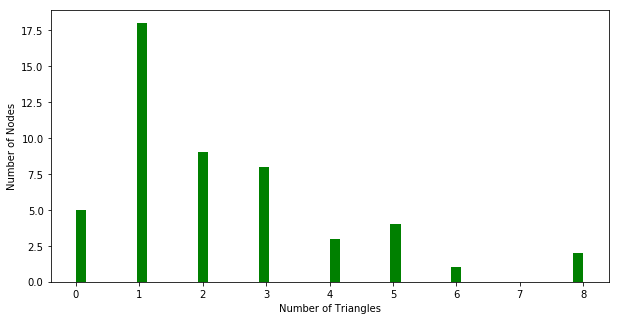

In [5]:
while True:
    G=nx.gnm_random_graph(50,150)
    cliques=list(nx.clique.enumerate_all_cliques(G))
    triangles=[ z for z in cliques if len(z)==3 ]
    if nx.is_connected(G) and len(triangles)>7: #nx.triangles(G,x)==4: #len(triangles)>3 and 
        break

cliques=list(nx.clique.enumerate_all_cliques(G))
triangles=[ z for z in cliques if len(z)==3 ]
print "There are %i triangles in this graph" %len(triangles)

trid={}
for n in G.nodes():
    u=[]
    for t in triangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
print ltrid
sd = list(sorted(ltrid, key=ltrid.__getitem__, reverse=True))

ts=ltrid.values()

plt.figure(figsize=(10,5));
plt.subplot(111)
bins=len(ts)
plt.xlabel("Number of Triangles");
plt.ylabel("Number of Nodes");
hist(ts,bins=bins,color='g'); 

In [6]:
for i in sd:
    if ltrid[i]>0:
        print "%s is in %i triangles" %(i,ltrid[i])

8 is in 8 triangles
44 is in 8 triangles
39 is in 6 triangles
20 is in 5 triangles
23 is in 5 triangles
29 is in 5 triangles
37 is in 5 triangles
30 is in 4 triangles
42 is in 4 triangles
48 is in 4 triangles
1 is in 3 triangles
5 is in 3 triangles
11 is in 3 triangles
15 is in 3 triangles
33 is in 3 triangles
43 is in 3 triangles
47 is in 3 triangles
49 is in 3 triangles
3 is in 2 triangles
10 is in 2 triangles
14 is in 2 triangles
17 is in 2 triangles
21 is in 2 triangles
25 is in 2 triangles
26 is in 2 triangles
27 is in 2 triangles
45 is in 2 triangles
2 is in 1 triangles
4 is in 1 triangles
6 is in 1 triangles
7 is in 1 triangles
9 is in 1 triangles
12 is in 1 triangles
13 is in 1 triangles
16 is in 1 triangles
19 is in 1 triangles
22 is in 1 triangles
24 is in 1 triangles
28 is in 1 triangles
31 is in 1 triangles
34 is in 1 triangles
35 is in 1 triangles
38 is in 1 triangles
40 is in 1 triangles
41 is in 1 triangles


Node 30 is in the 4 triangles [[11, 13, 30], [11, 30, 39], [11, 30, 49], [30, 33, 49]]


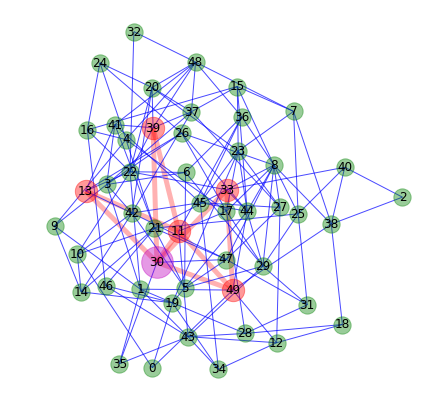

In [7]:
tris=[]
for k,v in ltrid.items():
    if v==4:
        tris.append(k) 
x=random.choice(tris)

# x=sd[12]
# x=40
# x=random.choice(range(50))
X=trid[x] #[0]
print "Node %i is in the %i triangles %s" %(x,len(X),X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Directed triangles in directed graphs

There are 9 directed triangles in this graph
{0: 3, 1: 5, 2: 0, 3: 1, 4: 2, 5: 5, 6: 2, 7: 5, 8: 1, 9: 3}
5
Node 1 is in the 5 directed triangles [[1, 7, 5], [1, 7, 4], [1, 7, 3], [1, 7, 9], [1, 9, 4]]


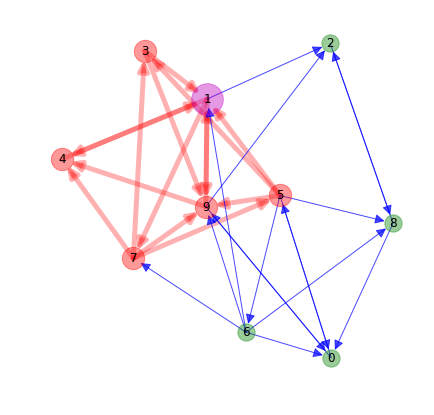

In [8]:
while True:
    G=nx.erdos_renyi_graph(10,0.35,directed=True)
    scycles=list(nx.simple_cycles(G))
    dtriangles=[ z for z in scycles if len(z)==3 ]
    if len(triangles)>3: 
        break

scycles=list(nx.simple_cycles(G))
dtriangles=[ z for z in scycles if len(z)==3 ]
print "There are %i directed triangles in this graph" %len(dtriangles)

trid={}
for n in G.nodes():
    u=[]
    for t in dtriangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
print ltrid
tri=[]
for _ in range(len(G)):
    m=random.choice(ltrid.values())
    if m>3:
        break
print m
for k,v in trid.items():
    if len(v)==m:
        tri.append(k)
x=random.choice(tri)

X=trid[x] 
print "Node %i is in the %i directed triangles %s" %(x,len(X),X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Counting directed triangles in directed graphs

There are 13 directed triangles in this graph
{0: 2, 1: 3, 2: 6, 3: 0, 4: 3, 5: 9, 6: 7, 7: 6, 8: 1, 9: 2}
5 is in 9 directed triangles
6 is in 7 directed triangles
2 is in 6 directed triangles
7 is in 6 directed triangles
1 is in 3 directed triangles
4 is in 3 directed triangles
0 is in 2 directed triangles
9 is in 2 directed triangles
8 is in 1 directed triangles


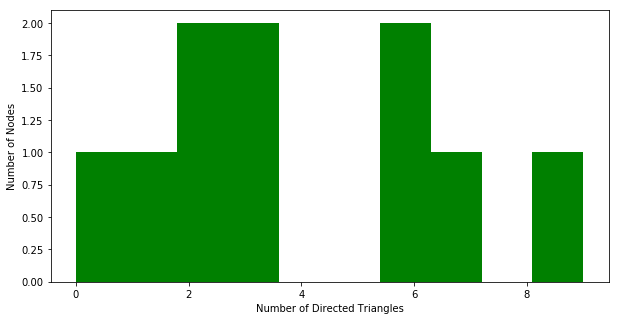

In [9]:
while True:
    G=nx.erdos_renyi_graph(10,0.35,directed=True)
    scycles=list(nx.simple_cycles(G))
    dtriangles=[ z for z in scycles if len(z)==3 ]
    if len(dtriangles)>3: #and nx.triangles(G,x)==3:
        break

scycles=list(nx.simple_cycles(G))
dtriangles=[ z for z in scycles if len(z)==3 ]
print "There are %i directed triangles in this graph" %len(dtriangles)

trid={}
for n in G.nodes():
    u=[]
    for t in dtriangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
print ltrid
sd = list(sorted(ltrid, key=ltrid.__getitem__, reverse=True))

for i in sd:
    if ltrid[i]>0:
        print "%s is in %i directed triangles" %(i,ltrid[i])
        
ts=ltrid.values()

plt.figure(figsize=(10,5));
plt.subplot(111)
bins=len(ts)
plt.xlabel("Number of Directed Triangles");
plt.ylabel("Number of Nodes");
hist(ts,bins=bins,color='g');

Node 2 is in the 6 directed triangles [[1, 6, 2], [1, 5, 2], [2, 6, 7], [2, 5, 7], [2, 5, 6], [2, 8, 6]]


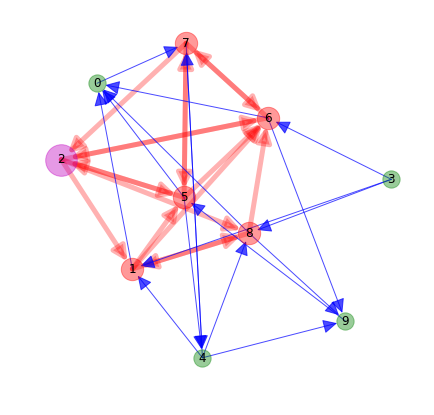

In [10]:
tris=[]
for _ in range(len(G)):
    m=random.choice(ltrid.values())
    if m>2:
        break
for k,v in ltrid.items():
    if v==m:
        tris.append(k) 
x=random.choice(tris)

# x=7
# x=sd[3]
X=trid[x] #[0]
print "Node %i is in the %i directed triangles %s" %(x,len(X),X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=30,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=30,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

<a id='3'></a>
## 3. Cycles

**Given a graph** ***G=(V,E)*** **and an integer** ***k > 3***, **a subgraph** ***Xk*** **of** ***G*** **is a** ***k-cycle*** **if** ***Xk*** **contains** ***k*** **vertices** ***x1, x2, ..., xk ∈ V*** **and** ***k*** **edges** ***(x1,x2), (x2,x3), ..., (x(k-1),xk) ∈ E.**

***k*** **is called** ***cycle length*.**

**Apparently:**
* ***3-cycles* are triangles,**
* ***4-cycles* are quadrangles,**
* ***5-cycles* are pentagons,**
* ***6-cycles* are hexagonss,**
* **etc.**

### Computation of the *maximum* cycle length *mc* in a graph:

* **For an undirected graph *G*:**

***mc = max([len(s) for s in list(nx.cycle_basis(G))])***
* **For a directed graph *G*:**

***mc = max([len(s) for s in list(nx.simple_cycles(G))])***

### Cycles in undirected graphs

The maximum cycle length of this graph is 5
There are 1 5-cycles in this graph: [[1, 9, 4, 8, 0]]
Node 8 is in the 1 5-cycle [[1, 9, 4, 8, 0]]


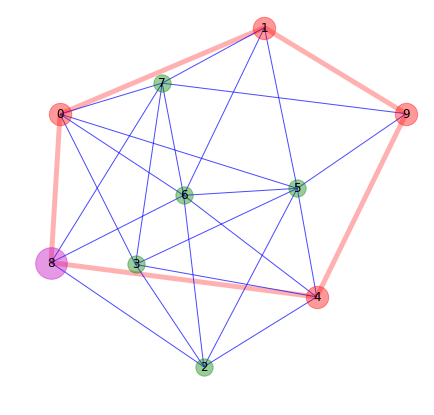

In [11]:
kk=5

while True:
    G=nx.erdos_renyi_graph(10,0.75)
    scycles=list(nx.cycle_basis(G))
    dtriangles=[ z for z in scycles if len(z)==kk ]
    if len(dtriangles)>0: 
        break

print "The maximum cycle length of this graph is", max([len(s) for s in list(nx.cycle_basis(G))])

scycles=list(nx.cycle_basis(G))
dtriangles=[ z for z in scycles if len(z)==kk ]
print "There are %i %i-cycles in this graph: %s" %(len(dtriangles),kk,dtriangles)

trid={}
for n in G.nodes():
    u=[]
    for t in dtriangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
ltrid.values()
tri=[]
for _ in range(len(G)):
    m=random.choice(ltrid.values())
    if m>0:
        break
for k,v in trid.items():
    if len(v)==m:
        tri.append(k)
x=random.choice(tri)

X=trid[x] 
print "Node %i is in the %i %i-cycle %s" %(x,len(X),kk,X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Counting cycles in undirected graphs

The maximum cycle length of this graph is 4
There are 5 4-cycles in this graph: [[8, 4, 7, 0], [5, 4, 7, 0], [6, 4, 7, 0], [5, 1, 7, 0], [6, 1, 7, 0]]
0 is in 5 4-cycles
7 is in 5 4-cycles
4 is in 3 4-cycles
1 is in 2 4-cycles
5 is in 2 4-cycles
6 is in 2 4-cycles
8 is in 1 4-cycles


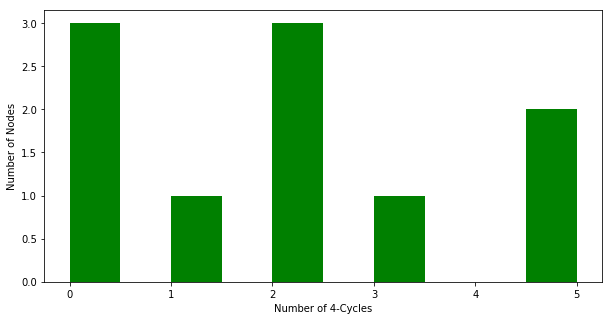

In [12]:
kk=4

while True:
    G=nx.erdos_renyi_graph(10,0.35)
    scycles=list(nx.cycle_basis(G))
    dtriangles=[ z for z in scycles if len(z)==kk ]
    if len(dtriangles)>3: 
        break

print "The maximum cycle length of this graph is", max([len(s) for s in list(nx.cycle_basis(G))])

scycles=list(nx.cycle_basis(G))
dtriangles=[ z for z in scycles if len(z)==kk ]
print "There are %i %i-cycles in this graph: %s" %(len(dtriangles),kk,dtriangles)

trid={}
for n in G.nodes():
    u=[]
    for t in dtriangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
# print ltrid
sd = list(sorted(ltrid, key=ltrid.__getitem__, reverse=True))

for i in sd:
    if ltrid[i]>0:
        print "%s is in %i %i-cycles" %(i,ltrid[i],kk)
        
ts=ltrid.values()

plt.figure(figsize=(10,5));
plt.subplot(111)
bins=len(ts)
st="Number of %i-Cycles" %kk
plt.xlabel(st);
plt.ylabel("Number of Nodes");
hist(ts,bins=bins,color='g');

Node 0 is in the 5 4-cycles [[8, 4, 7, 0], [5, 4, 7, 0], [6, 4, 7, 0], [5, 1, 7, 0], [6, 1, 7, 0]]


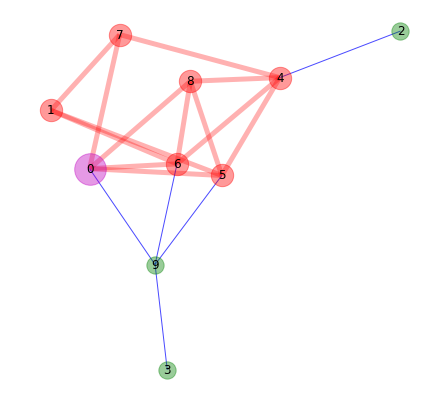

In [13]:
tris=[]
for _ in range(len(G)):
    m=random.choice(ltrid.values())
    if m>2:
        break
for k,v in ltrid.items():
    if v==m:
        tris.append(k) 
x=random.choice(tris)

# x=7
# x=sd[3]
X=trid[x] #[0]
print "Node %i is in the %i %i-cycles %s" %(x,len(X),kk,X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=30,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=30,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Directed cycles in directed graphs

The maximum directed cycle length of this graph is 7
There are 3 directed 6-cycles in this graph: [[0, 4, 2, 8, 5, 9], [0, 3, 4, 2, 8, 5], [0, 3, 2, 8, 5, 9]]
Node 4 is in the 2 directed 6-cycles [[0, 4, 2, 8, 5, 9], [0, 3, 4, 2, 8, 5]]


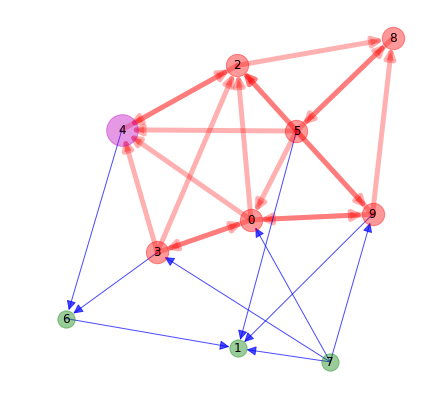

In [14]:
kk=6

while True:
    G=nx.erdos_renyi_graph(10,0.35,directed=True)
    scycles=list(nx.simple_cycles(G))
    dtriangles=[ z for z in scycles if len(z)==kk ]
    if len(dtriangles)>0: 
        dn=[]
        for z in dtriangles:
            if z not in dn:
                dn.append(z)
        if len(dn)<10/2:
            break

print "The maximum directed cycle length of this graph is", max([len(s) for s in list(nx.simple_cycles(G))])

scycles=list(nx.simple_cycles(G))
dtriangles=[ z for z in scycles if len(z)==kk ]
print "There are %i directed %i-cycles in this graph: %s" %(len(dtriangles),kk,dtriangles)

trid={}
for n in G.nodes():
    u=[]
    for t in dtriangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
ltrid.values()
tri=[]
for _ in range(len(G)):
    m=random.choice(ltrid.values())
    if m>0:
        break
for k,v in trid.items():
    if len(v)==m:
        tri.append(k)
x=random.choice(tri)

X=trid[x] 
print "Node %i is in the %i directed %i-cycles %s" %(x,len(X),kk,X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=20,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

### Counting directed cycles in directed graphs

The maximum directed cycle length of this graph is 8
There are 7 directed 4-cycles in this graph: [[0, 6, 8, 7], [0, 6, 8, 1], [0, 6, 5, 7], [0, 2, 6, 7], [0, 2, 6, 5], [0, 2, 6, 1], [0, 8, 7, 6]]
0 is in 7 directed 4-cycles
6 is in 7 directed 4-cycles
7 is in 4 directed 4-cycles
2 is in 3 directed 4-cycles
8 is in 3 directed 4-cycles
1 is in 2 directed 4-cycles
5 is in 2 directed 4-cycles


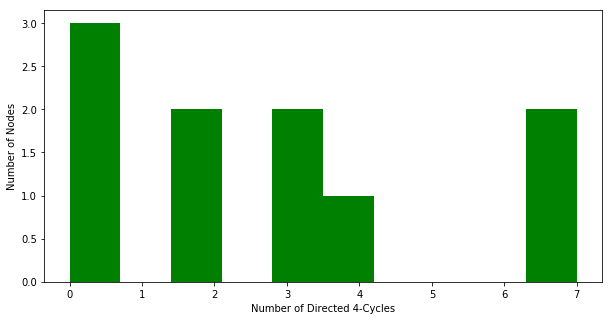

In [15]:
kk=4

while True:
    G=nx.erdos_renyi_graph(10,0.25,directed=True)
    scycles=list(nx.simple_cycles(G))
    dtriangles=[ z for z in scycles if len(z)==kk ]
    if len(dtriangles)>3: 
        break

print "The maximum directed cycle length of this graph is", max([len(s) for s in list(nx.simple_cycles(G))])

scycles=list(nx.simple_cycles(G))
dtriangles=[ z for z in scycles if len(z)==kk ]
print "There are %i directed %i-cycles in this graph: %s" %(len(dtriangles),kk,dtriangles)

trid={}
for n in G.nodes():
    u=[]
    for t in dtriangles:
        if n in t:
            u.append(t)
    trid[n]=u
ltrid={k:len(v) for k,v in trid.items()}
# print ltrid
sd = list(sorted(ltrid, key=ltrid.__getitem__, reverse=True))

for i in sd:
    if ltrid[i]>0:
        print "%s is in %i directed %i-cycles" %(i,ltrid[i],kk)
        
ts=ltrid.values()

plt.figure(figsize=(10,5));
plt.subplot(111)
bins=len(ts)
st="Number of Directed %i-Cycles" %kk
plt.xlabel(st);
plt.ylabel("Number of Nodes");
hist(ts,bins=bins,color='g');

Node 2 is in the 3 directed 4-cycles [[0, 2, 6, 7], [0, 2, 6, 5], [0, 2, 6, 1]]


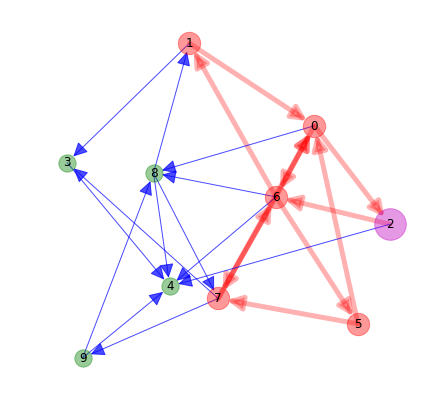

In [16]:
tris=[]
for _ in range(len(G)):
    m=random.choice(ltrid.values())
    if m>2:
        break
for k,v in ltrid.items():
    if v==m:
        tris.append(k) 
x=random.choice(tris)

# x=7
# x=sd[3]
X=trid[x] #[0]
print "Node %i is in the %i directed %i-cycles %s" %(x,len(X),kk,X)

X1=[]
for y in X:
    for yy in y:
        if yy not in X1:
            X1.append(yy)
X=X1
Xx=[n for n in X if n!=x]
cX=[n for n in G.nodes() if n not in X]
eX=[e for e in G.edges() if e[0] in X and e[1] in X]
ceX=[e for e in G.edges() if e not in eX]

pos=graphviz_layout(G) #nx.spring_layout(G,k=1.5) 
fig=plt.figure(figsize=(7,7))
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[x],node_size=1000,node_color="m", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=Xx,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=cX,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, arrowsize=30,edgelist=eX,width=5,edge_color="r", alpha=0.3)
nx.draw_networkx_edges(G, pos, arrowsize=30,edgelist=ceX,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

<a id='4'></a>
## 4. Egocentric Subgraphs (Ego-Nets)

**In this section we are going to consider only undirected graphs. The case of directed graphs can be similarly examined under usual modifications.**

**Let *G=(V,E)* a graph and *u ∈ V* a vertex of *G* having at least one neighbor.**
* **The subgraph of the set of all neighbors of** ***u*** **together with** ***u*** **is called** ***egocentric subgraph*** **or** ***ego-net*** **of** ***u*** **(or** ***centered at u***) **in** ***G*** **and it is denoted as** ***EN(u)***.
* **In other words, the ego-net of** ***u*** **contains: (1) all links containg** ***u*** **to its neighbors and (2) all links among** ***u***'**s neighbors.**
* **Vertex** ***u*** **is called the** ***ego*** **and** ***u***'**s neighbors are called** ***alters***.

**The case that** ***u*** **is an isolate creates the** ***trivial ego-net*** **of** ***u*** **composed of a single vertex** (***u*** **itself) without any edges.**

In [17]:
def egoc(G,u):
    ii=[u]
    nbi=list(nx.neighbors(G,u)) #+ii
    eG=G.subgraph(nbi+ii) #)
    aGi=G.subgraph(nx.neighbors(G,u))
    oi=[y for y in G.nodes() if y not in nbi+ii and y!=u] #+ii
    eg=eG.edges()
    eegi=[e for e in eg if e not in aGi.edges()]
    eagi=aGi.edges()
    eoi=[e for e in G.edges() if e not in eg]
    return eG,nbi,aGi,oi,eegi,eagi,eoi

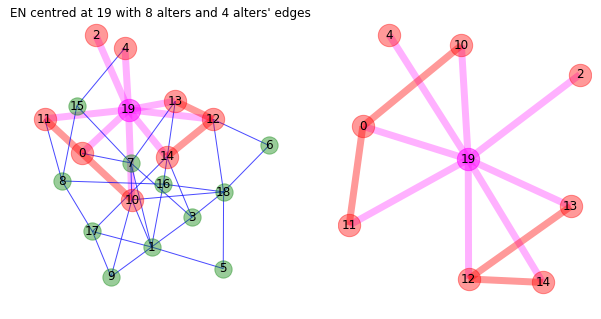

In [18]:
while True:
    G=nx.erdos_renyi_graph(20,0.25)
    if nx.is_connected(G)==True:
            break

while True:
    u=random.choice(list(G.nodes()))
    if len(list(nx.neighbors(G,u)))>3:
        Gu=G.subgraph(nx.neighbors(G,u))
        if len(Gu.edges())>2:
            break
        
eG=egoc(G,u)[0]
nb=egoc(G,u)[1]
aG=egoc(G,u)[2]
o=egoc(G,u)[3]
eeg=egoc(G,u)[4]
eag=egoc(G,u)[5]
eo=egoc(G,u)[6]

plt.figure(figsize=(10,5));
plt.subplot(121)
pos=graphviz_layout(G);
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[u],node_size=500,node_color="magenta", alpha=0.5)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb,node_size=500,node_color="r", alpha=0.4)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=o,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=eeg,width=7,edge_color="magenta", alpha=0.3)
nx.draw_networkx_edges(G, pos, edgelist=eag,width=7,edge_color="r", alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=eo,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
st="EN centred at %i with %i alters and %i alters' edges" %(u,len(list(nx.neighbors(G,u))),len((aG).edges()))
plt.title(st)
plt.axis('off');

plt.subplot(122)
G=eG
pos=graphviz_layout(G);
nodes = nx.draw_networkx_nodes(G, pos, nodelist=[u],node_size=500,node_color="magenta", alpha=0.5)
nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb,node_size=500,node_color="r", alpha=0.4)
# nodes = nx.draw_networkx_nodes(G, pos, nodelist=o,node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edgelist=eeg,width=7,edge_color="magenta", alpha=0.3)
nx.draw_networkx_edges(G, pos, edgelist=eag,width=7,edge_color="r", alpha=0.4)
# nx.draw_networkx_edges(G, pos, edgelist=eo,edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
# st="Ego-net of %i with %i alters and %i alters' edges" %(u,len(list(nx.neighbors(G,u))),len((aG).edges()))
# plt.title(st)
plt.axis('off');

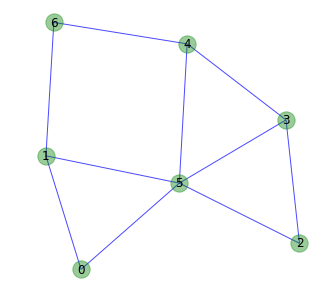

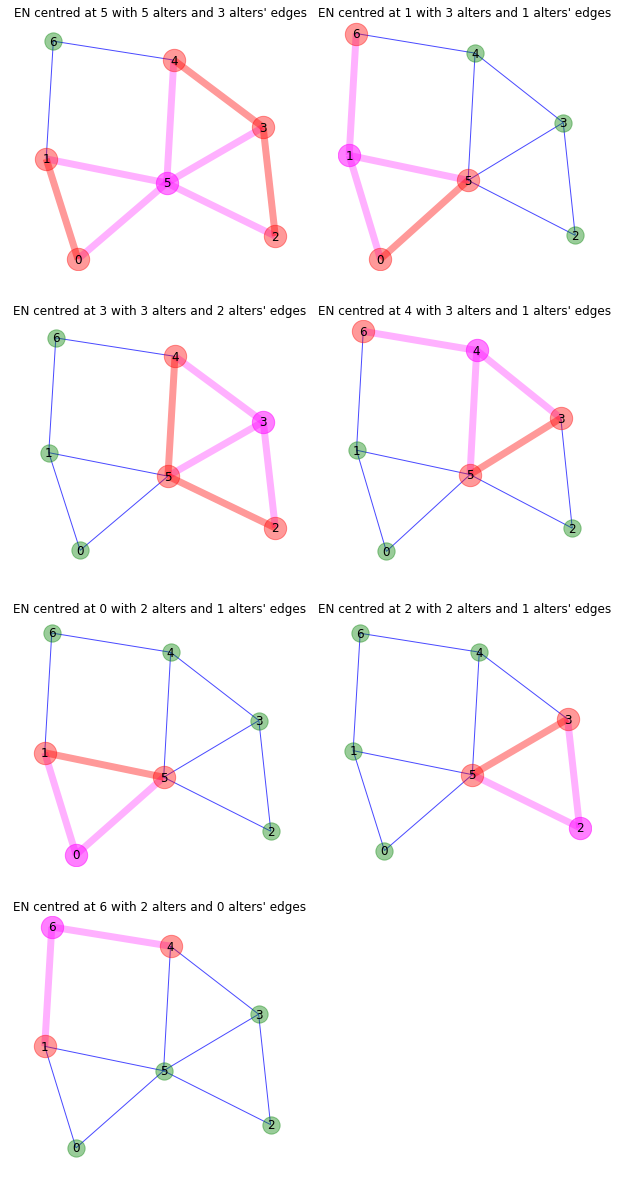

In [19]:
while True:
    G=nx.gnm_random_graph(7,10)
    if nx.is_connected(G)==True:
            break

sd = list(sorted(dict(G.degree()), key=dict(G.degree()).__getitem__, reverse=True))
ssd=[[i] for i in sd]

pos=graphviz_layout(G);

plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

if (len(sd)/2.)%2==0:
    r=int(len(sd)/2.)
else:
    r=int(math.ceil(len(sd)/2.))

fig, ax = plt.subplots(r,2,figsize=(10,3*len(G)), sharex=True)
for i,j in list(enumerate(sd)):
    plt.subplot(r,2,i+1);
    i=j
    eG=egoc(G,i)[0]
    nb=egoc(G,i)[1]
    aG=egoc(G,i)[2]
    o=egoc(G,i)[3]
    eeg=egoc(G,i)[4]
    eag=egoc(G,i)[5]
    eo=egoc(G,i)[6]
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb,node_size=500,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o,node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eeg,width=7,edge_color="magenta", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eag,width=7,edge_color="r", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eo,edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    st="EN centred at %i with %i alters and %i alters' edges" %(i,len(list(nx.neighbors(G,i))),len((aG).edges()))
    plt.title(st)
    plt.axis('off');
ax[r-1,1].set_visible(False)

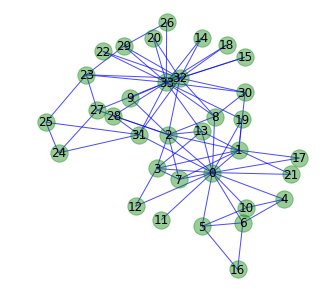

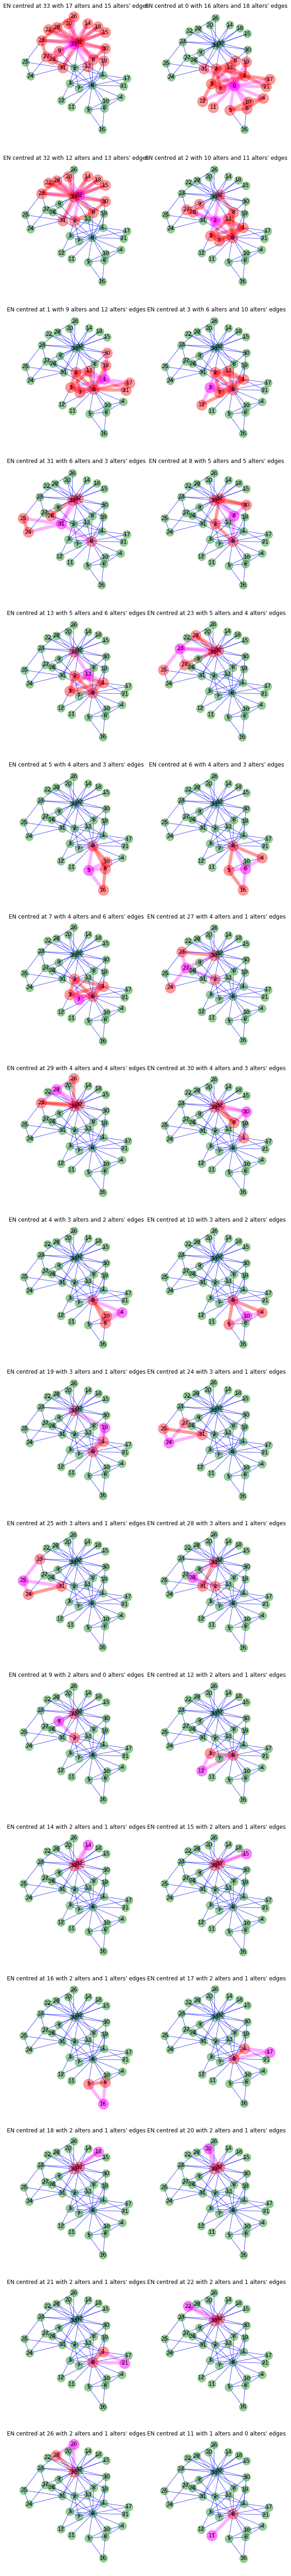

In [20]:
G=nx.karate_club_graph()

sd = list(sorted(dict(G.degree()), key=dict(G.degree()).__getitem__, reverse=True))
ssd=[[i] for i in sd]

pos=graphviz_layout(G);

plt.figure(figsize=(5,5));
nodes = nx.draw_networkx_nodes(G, pos, node_color="g", alpha=0.4)
nx.draw_networkx_edges(G, pos, edge_color="b", alpha=0.7)
nx.draw_networkx_labels(G, pos)
plt.axis('off');

if (len(sd)/2.)%2==0:
    r=int(len(sd)/2.)
else:
    r=int(math.ceil(len(sd)/2.))

fig, ax = plt.subplots(r,2,figsize=(10,3*len(G)), sharex=True)
for i,j in list(enumerate(sd)):
    plt.subplot(len(sd)/2,2,i+1);
    i=j
    eG=egoc(G,i)[0]
    nb=egoc(G,i)[1]
    aG=egoc(G,i)[2]
    o=egoc(G,i)[3]
    eeg=egoc(G,i)[4]
    eag=egoc(G,i)[5]
    eo=egoc(G,i)[6]
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=[i],node_size=500,node_color="magenta", alpha=0.5)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=nb,node_size=500,node_color="r", alpha=0.4)
    nodes = nx.draw_networkx_nodes(G, pos, nodelist=o,node_color="g", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eeg,width=7,edge_color="magenta", alpha=0.3)
    nx.draw_networkx_edges(G, pos, edgelist=eag,width=7,edge_color="r", alpha=0.4)
    nx.draw_networkx_edges(G, pos, edgelist=eo,edge_color="b", alpha=0.7)
    nx.draw_networkx_labels(G, pos)
    st="EN centred at %i with %i alters and %i alters' edges" %(i,len(list(nx.neighbors(G,i))),len((aG).edges()))
    plt.title(st)
    plt.axis('off');
ax[r-1,1].set_visible(False)